The e-power at step 2 in the SHINE algorithm is 0.11457589811230641


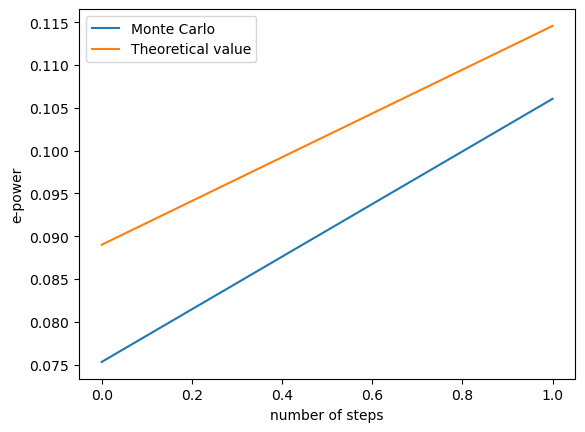

The e-variable X takes values on [0.35810909 0.78427474 1.20528979 1.56190243]
The probability mass function of X under P1 is given by [0.25507204 0.25973608 0.2290538  0.28267737]
The probability mass function of X under P2 is given by [0.18970587 0.25960464 0.22863467 0.28274167]
The probability mass function of X under Q is given by [0.08587312 0.19203148 0.2799637  0.4421317 ]


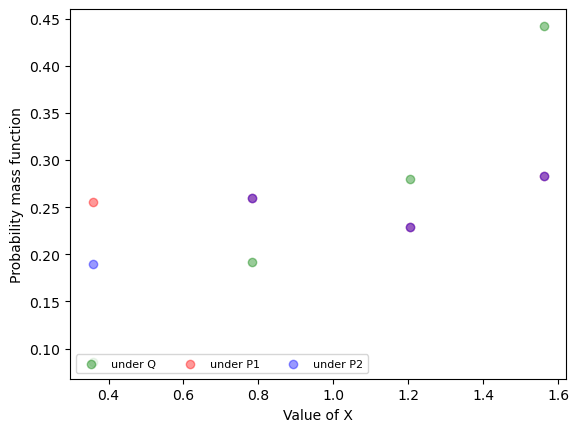

In [19]:
import numpy as np
import math
from numpy import *
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.optimize import fsolve,bisect
import scipy.special as special
import random


#For the Gaussian setup, P1 is N(mu1,sigma1^2). P2 is N(mu2,sigma2^2). Q is N(0,1)
mu1=1
mu2=-1
sigma1=1
sigma2=1
#L is number of samples in Monte Carlo simulation
L=20000
#K is number of iterations we run the algorithm
K=7

#For general distributions with density, can replace the densities below directly
def qpdf(x):
    return math.exp(-x**2/2)/(2*math.pi)**(1/2)
def p1pdf(x):
    return math.exp(-(x-mu1)**2/(2*sigma1**2))/(2*math.pi*sigma1**2)**(1/2)
def p2pdf(x):
    return math.exp(-(x-mu2)**2/(2*sigma2**2))/(2*math.pi*sigma2**2)**(1/2)
    
    
#evaluating Radon-Nikodym derivatives
def dp1dq(x):
    return p1pdf(x)/qpdf(x)
def dp2dq(x):
    return p2pdf(x)/qpdf(x)

#evaluating (inverse) distribution functions
def qcdf(y):
    return integrate.quad(lambda x: qpdf(x), -np.inf,y)[0]
def p1cdf(y):
    return integrate.quad(lambda x: p1pdf(x), -np.inf,y)[0]
def p2cdf(y):
    return integrate.quad(lambda x: p2pdf(x), -np.inf,y)[0]
def qcdfinv(y):
    def qy(x):
        return qcdf(x)-y
    return fsolve(qy,0)

#simulating the measure gamma=(dP1/dQ,dP2/dQ) under law Q
qvalues=[]
for n in range(L):
    qvalues.append(qcdfinv(random.uniform(0,1))[0])
dp1dqvalues=np.vectorize(dp1dq)(qvalues)
dp2dqvalues=np.vectorize(dp2dq)(qvalues)


def countmeanbelow(x,s,x_up,s_up,x_down,s_down):#equation is b=s(a-x)+x
    u=0
    v=0
    num=0
    if s<1:
        for n in range(L):
            up_count=0
            down_count=0
            for i in range(len(x_up)):
                if dp2dqvalues[n]<s_up[i]*(dp1dqvalues[n]-x_up[i])+x_up[i]:
                    up_count=up_count+1
            for i in range(len(x_down)):
                 if dp2dqvalues[n]>s_down[i]*(dp1dqvalues[n]-x_down[i])+x_down[i]:
                    down_count=down_count+1
            if up_count==0 and down_count==0 and dp2dqvalues[n]<s*(dp1dqvalues[n]-x)+x:
                u=u+dp1dqvalues[n]
                v=v+dp2dqvalues[n]
                num=num+1
        if num==0:
            return [0,0,0]
        if num>0:
            return [u/num,v/num,num/L]
    if s>1:
        for n in range(L):
            up_count=0
            down_count=0
            for i in range(len(x_up)):
                if dp2dqvalues[n]<s_up[i]*(dp1dqvalues[n]-x_up[i])+x_up[i]:
                    up_count=up_count+1
            for i in range(len(x_down)):
                 if dp2dqvalues[n]>s_down[i]*(dp1dqvalues[n]-x_down[i])+x_down[i]:
                    down_count=down_count+1
            if up_count==0 and down_count==0 and dp2dqvalues[n]>s*(dp1dqvalues[n]-x)+x:
                u=u+dp1dqvalues[n]
                v=v+dp2dqvalues[n]
                num=num+1
        if num==0:
            return [0,0,0]
        if num>0:
            return [u/num,v/num,num/L]
        
def countmeanabove(x,s,x_up,s_up,x_down,s_down):
    u=0
    v=0
    num=0
    if s<1:
        for n in range(L):
            up_count=0
            down_count=0
            for i in range(len(x_up)):
                if dp2dqvalues[n]<s_up[i]*(dp1dqvalues[n]-x_up[i])+x_up[i]:
                    up_count=up_count+1
            for i in range(len(x_down)):
                 if dp2dqvalues[n]>s_down[i]*(dp1dqvalues[n]-x_down[i])+x_down[i]:
                    down_count=down_count+1
            if up_count==0 and down_count==0 and dp2dqvalues[n]>s*(dp1dqvalues[n]-x)+x:
                u=u+dp1dqvalues[n]
                v=v+dp2dqvalues[n]
                num=num+1
        if num==0:
            return [0,0,0]
        if num>0:
            return [u/num,v/num,num/L]
    if s>1:
        for n in range(L):
            up_count=0
            down_count=0
            for i in range(len(x_up)):
                if dp2dqvalues[n]<s_up[i]*(dp1dqvalues[n]-x_up[i])+x_up[i]:
                    up_count=up_count+1
            for i in range(len(x_down)):
                 if dp2dqvalues[n]>s_down[i]*(dp1dqvalues[n]-x_down[i])+x_down[i]:
                    down_count=down_count+1
            if up_count==0 and down_count==0 and dp2dqvalues[n]<s*(dp1dqvalues[n]-x)+x:
                u=u+dp1dqvalues[n]
                v=v+dp2dqvalues[n]
                num=num+1
        if num==0:
            return [0,0,0]
        if num>0:
            return [u/num,v/num,num/L]

#solving for the slopes of the separating hyperplanes (lines)
def solveslope(x,x_up,s_up,x_down,s_down):
    def diffatx(s):
        return countmeanbelow(x,s**(-1)+1,x_up,s_up,x_down,s_down)[0]-countmeanbelow(x,s**(-1)+1,x_up,s_up,x_down,s_down)[1]
    u=bisect(diffatx,-20,19,xtol=0.00001)
    return u**(-1)+1

A=[[1],[1]]#first row is positions (increasingly sorted) second row is probabilities.

B=[]
x_=[]
s_=[]
for n in range(K):
  #  print(n)
    A0=A.copy()
    #need 2^n-1 length of x_ and s_
    if n==0:
        firstslope=solveslope(A0[0][0],[],[],[],[])
        lastslope=solveslope(A0[0][-1],[],[],[],[])#should be equal..
        xfirst=[countmeanbelow(A0[0][0],firstslope,[],[],[],[])[0],countmeanbelow(A0[0][0],firstslope,[],[],[],[])[2]]
        xlast=[countmeanabove(A0[0][-1],lastslope,[],[],[],[])[0],countmeanabove(A0[0][-1],lastslope,[],[],[],[])[2]]
        A=np.c_[A,xfirst]
        A=np.c_[A,xlast]
        x_.append(1)
        s_.append(firstslope)
    
    if n>0:#A has 2^(n+1)-1 columns
        xcopy=x_.copy()
        scopy=s_.copy()
        Pprob=[[],[]]
        for k in range(2**n):#need to find 2^n hyperplanes
          #  print(k)
            x_up=[]
            s_up=[]
            x_down=[]
            s_down=[]
            for i in range(len(xcopy)):
                if xcopy[i]<A0[0][2*k]:
                    x_up.append(xcopy[i])
                    s_up.append(scopy[i])
                if xcopy[i]>A0[0][2*k]:
                    x_down.append(xcopy[i])
                    s_down.append(scopy[i])
            kslope=solveslope(A0[0][2*k],x_up,s_up,x_down,s_down)
            x=[countmeanbelow(A0[0][2*k],kslope,x_up,s_up,x_down,s_down)[0],\
               countmeanbelow(A0[0][2*k],kslope,x_up,s_up,x_down,s_down)[2]]
            y=[countmeanabove(A0[0][2*k],kslope,x_up,s_up,x_down,s_down)[0],\
               countmeanabove(A0[0][2*k],kslope,x_up,s_up,x_down,s_down)[2]]
            A=np.c_[A,x]
            A=np.c_[A,y]
            x_.append(A0[0][2*k])
            s_.append(kslope)
            #print(kslope)
            
            #count probability under P
            p1=0
            p2=0
            for l in range(L):

                up_count=0
                down_count=0
                for j in range(len(x_up)):
                    if dp2dqvalues[l]<s_up[j]*(dp1dqvalues[l]-x_up[j])+x_up[j]:
                        up_count=up_count+1
                for j in range(len(x_down)):
                     if dp2dqvalues[l]>s_down[j]*(dp1dqvalues[l]-x_down[j])+x_down[j]:
                        down_count=down_count+1
                if up_count==0 and down_count==0:
                    p1=p1+dp1dqvalues[l]
                    p2=p2+dp2dqvalues[l]
            Pprob=np.c_[Pprob,[p1/L,p2/L]]
       # print(Pprob)
        #print(np.sum(Pprob,axis=1).tolist())
                
            
    #sorting according to first entry        
    your_matrix = A
    your_last_row = your_matrix[0]
    #add indices
    reference_row = [(idx, value) for (idx, value) in enumerate(your_last_row)]
    ref_row_sorted = sorted(reference_row, key=lambda x: x[1])
    #extract indices
    indices = [x[0] for x in ref_row_sorted]
    new_matrix = []
    for row in your_matrix:
        new_row = [row[x] for x in indices]
        new_matrix.append(new_row)
    A=new_matrix
    #print(A)
    
    #computing e-power
    J=0
    for k in range(2**(n+2)-1):
        if (k%2)==0 and A[0][k]>0:
            J=J-A[1][k]*math.log(A[0][k])
    B.append(J)
    
    #print(J)

BB=[]
for i in range(len(B)-1):
    BB.append(B[i])
plt.plot(BB)


def f(x):
    F=(math.e**(-(math.log(x)+0.5)**2/2))/(math.sqrt(2*math.pi)*x)
    return F
def p(x):
    F=x+math.sqrt(x**2-1/math.e)
    return F
def m(x):
    F=x-math.sqrt(x**2-1/math.e)
    return F
#u = fsolve(f,1)
#print(u)

result = integrate.quad(lambda x: f(x), 0, np.inf)
A=[[1],[1]]

B=[]
for n in range(K):
    A0=A.copy()
    x0=[[(integrate.quad(lambda x: x*f(x),m(A[0][0]), p(A[0][0]))[0])/(2*integrate.quad(lambda x: f(x),1/math.sqrt(math.e), p(A[0][0]))[0])],\
           [2*integrate.quad(lambda x: f(x),1/math.sqrt(math.e), p(A[0][0]))[0]]]
    xinf=[[(integrate.quad(lambda x: x*f(x),  p(A[0][2**(n+1)-2]),np.inf)[0]+integrate.quad(lambda x: x*f(x),0,  m(A[0][2**(n+1)-2]))[0])/(2*integrate.quad(lambda x: f(x), p(A[0][2**(n+1)-2]),np.inf)[0])],\
           [2*integrate.quad(lambda x: f(x),  p(A[0][2**(n+1)-2]),np.inf)[0]]]
    A=np.c_[A,x0]
    A=np.c_[A,xinf]
    if n>0:
        for k in range(2**(n+1)-2):
            x=[[(integrate.quad(lambda x: x*f(x), p(A0[0][k]), p(A0[0][k+1]))[0]+integrate.quad(lambda x: x*f(x), m(A0[0][k+1]), m(A0[0][k]))[0])\
                /(2*integrate.quad(lambda x: f(x), p(A0[0][k]), p(A0[0][k+1]))[0])],\
               [2*integrate.quad(lambda x: f(x), p(A0[0][k]), p(A0[0][k+1]))[0]]]
            A=np.c_[A,x]
    your_matrix = A
    your_last_row = your_matrix[0]
    #add indices
    reference_row = [(idx, value) for (idx, value) in enumerate(your_last_row)]
    ref_row_sorted = sorted(reference_row, key=lambda x: x[1])
    #extract indices
    indices = [x[0] for x in ref_row_sorted]
    new_matrix = []
    for row in your_matrix:
        new_row = [row[x] for x in indices]
        new_matrix.append(new_row)
    A=new_matrix
    L=0
    for k in range(2**(n+2)-1):
        if (k%2)==0:
            L=L-A[1][k]*math.log(A[0][k])
    B.append(L)
BB=[]
for i in range(len(B)-1):
    BB.append(B[i])
print("The e-power at step",K-1, "in the SHINE algorithm is", BB[-1])#printing the e-power at step K-1
    
plt.plot(BB)#ploting the growth of the e-power
plt.xlabel("number of steps")
plt.ylabel("e-power")
plt.legend(['Monte Carlo', 'Theoretical value'])


plt.savefig('e-power.jpg')
plt.show()
plt.close()



XunderQP1P2=[[],[],[],[]]
meanQ=0
meanP=0
for k in range(2**(K+1)-1):
        if (k%4)==1:
            XunderQP1P2=np.c_[XunderQP1P2,[(A[0][k])**(-1),A[1][k],Pprob[0][int((k-1)/4)],Pprob[1][int((k-1)/4)]]]
            meanQ=meanQ+A[1][k]*(A[0][k])**(-1)
            meanP=meanP+Pprob[0][int((k-1)/4)]*(A[0][k])**(-1)
#returns distribution of X under P1,P2,Q
print("The e-variable X takes values on",XunderQP1P2[0][::-1])
print("The probability mass function of X under P1 is given by",XunderQP1P2[2][::-1])
print("The probability mass function of X under P2 is given by",XunderQP1P2[3][::-1])
print("The probability mass function of X under Q is given by",XunderQP1P2[1][::-1])
#print([meanQ,meanP])

#plot probability mass functions of the e-variable X under P1,P2,Q.
s1=plt.scatter(XunderQP1P2[0],XunderQP1P2[1], alpha=0.4,color="green")
s2=plt.scatter(XunderQP1P2[0],XunderQP1P2[2], alpha=0.4,color="red")
s3=plt.scatter(XunderQP1P2[0],XunderQP1P2[3], alpha=0.4,color="blue")

plt.legend((s1,s2,s3),
           ('under Q', 'under P1', 'under P2'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)
plt.xlabel("Value of X")
plt.ylabel("Probability mass function")

plt.savefig('e-variable.jpg')
plt.show()
plt.close()